In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.color_palette("cubehelix", 8)
sns.set_style("whitegrid", {'axes.grid' : False})

In [3]:
data = pd.read_csv('loan.csv')

C:\Users\rocky\AppData\Local\Temp\ipykernel_19128\144827106.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('loan.csv')


In [4]:

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [5]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [6]:
data['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

### Basic stats about our data 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [8]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [9]:
data.shape

(39717, 111)

### Handling missing value

In [10]:
null_data = data.isnull().sum()

In [11]:
null_data

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [12]:
null_data[null_data > 0]

emp_title                          2459
emp_length                         1075
desc                              12942
title                                11
mths_since_last_delinq            25682
mths_since_last_record            36931
revol_util                           50
last_pymnt_d                         71
next_pymnt_d                      38577
last_credit_pull_d                    2
collections_12_mths_ex_med           56
mths_since_last_major_derog       39717
annual_inc_joint                  39717
dti_joint                         39717
verification_status_joint         39717
tot_coll_amt                      39717
tot_cur_bal                       39717
open_acc_6m                       39717
open_il_6m                        39717
open_il_12m                       39717
open_il_24m                       39717
mths_since_rcnt_il                39717
total_bal_il                      39717
il_util                           39717
open_rv_12m                       39717


In [13]:
data.isnull().sum(axis=1)

0        58
1        57
2        59
3        56
4        55
         ..
39712    59
39713    59
39714    61
39715    61
39716    59
Length: 39717, dtype: int64

<h5>Getting the percentage of missing values by columns</h5> 

In [14]:
col_percentage=pd.DataFrame(data.isnull().mean().round(4)*100,columns =["Percentage_missing_value"]).sort_values(by=["Percentage_missing_value"])
print(col_percentage[col_percentage['Percentage_missing_value'] > 0])

                                Percentage_missing_value
last_credit_pull_d                                  0.01
title                                               0.03
tax_liens                                           0.10
revol_util                                          0.13
collections_12_mths_ex_med                          0.14
chargeoff_within_12_mths                            0.14
last_pymnt_d                                        0.18
pub_rec_bankruptcies                                1.75
emp_length                                          2.71
emp_title                                           6.19
desc                                               32.59
mths_since_last_delinq                             64.66
mths_since_last_record                             92.99
next_pymnt_d                                       97.13
num_bc_sats                                       100.00
mths_since_recent_bc                              100.00
mths_since_recent_bc_dlq       

<p><b>Removing columns</b> which have more than 50% of missing values as conservative approch best practices </p> 

In [15]:
threshold = 0.5

In [16]:
missing_pct = data.isnull().mean()

In [17]:
data_filtered = data.drop(columns=missing_pct[missing_pct > threshold].index)

In [18]:
data_filtered.shape

(39717, 54)

In [19]:
data_filtered.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

<b> Removing irrelevent columns as per Data Dictionary sheet</b>

In [20]:
columns_to_drop = [
    "id", "member_id", "url", "zip_code", "desc", "title", "last_credit_pull_d",
     "sub_grade", "emp_title","chargeoff_within_12_mths","tax_liens",
    "funded_amnt_inv", "out_prncp_inv", "policy_code","collections_12_mths_ex_med",
    "recoveries", "collection_recovery_fee", "last_pymnt_amnt", "last_pymnt_d",
    "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee"
]

In [21]:
data_filtered = data_filtered.drop(columns=columns_to_drop, axis=1)

In [22]:
data_filtered = data_filtered[data_filtered.loan_status!='Current']

In [23]:
data_filtered.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'total_pymnt_inv',
       'application_type', 'acc_now_delinq', 'delinq_amnt',
       'pub_rec_bankruptcies'],
      dtype='object')

<b>Checking null value post dropping columns</b>

In [24]:
data_filtered.isnull().sum().sort_values(ascending=False)

emp_length              1033
pub_rec_bankruptcies     697
revol_util                50
delinq_2yrs                0
delinq_amnt                0
acc_now_delinq             0
application_type           0
total_pymnt_inv            0
out_prncp                  0
initial_list_status        0
total_acc                  0
revol_bal                  0
pub_rec                    0
open_acc                   0
inq_last_6mths             0
earliest_cr_line           0
loan_amnt                  0
funded_amnt                0
addr_state                 0
purpose                    0
pymnt_plan                 0
loan_status                0
issue_d                    0
verification_status        0
annual_inc                 0
home_ownership             0
grade                      0
installment                0
int_rate                   0
term                       0
dti                        0
dtype: int64

In [25]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   term                  38577 non-null  object 
 3   int_rate              38577 non-null  object 
 4   installment           38577 non-null  float64
 5   grade                 38577 non-null  object 
 6   emp_length            37544 non-null  object 
 7   home_ownership        38577 non-null  object 
 8   annual_inc            38577 non-null  float64
 9   verification_status   38577 non-null  object 
 10  issue_d               38577 non-null  object 
 11  loan_status           38577 non-null  object 
 12  pymnt_plan            38577 non-null  object 
 13  purpose               38577 non-null  object 
 14  addr_state            38577 non-null  object 
 15  dti                   38

## Data Imputation

In [26]:
data_filtered['emp_length'].mode()[0]

'10+ years'

In [27]:
emp_length_mode = data_filtered['emp_length'].value_counts()

In [28]:
emp_length_mode 

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [29]:
data_filtered['emp_length'] = data_filtered['emp_length'].fillna(data_filtered['emp_length'].mode()[0])

In [30]:
data_filtered['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
5          3 years
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 38577, dtype: object

In [31]:
data_filtered = data_filtered.dropna(subset=['revol_util'])

In [32]:
data_filtered['revol_util'].isnull().sum()

0

# Standerdization of data

In [33]:
data_filtered['revol_util'].head()

0    83.70%
1     9.40%
2    98.50%
3       21%
5    28.30%
Name: revol_util, dtype: object

In [34]:
def removePercentageSign(x):
    # lambda x: x[0:-1] if x[-1] == '%' else x
    if x[-1] == '%':
        return x[0:-1]
    else :
        return x

In [35]:
data_filtered.loc[:, 'revol_util'] = data_filtered['revol_util'].apply(removePercentageSign)

In [36]:
data_filtered['revol_util'].head()

0    83.70
1     9.40
2    98.50
3       21
5    28.30
Name: revol_util, dtype: object

In [37]:
data_filtered['revol_util'] = data_filtered['revol_util'].astype('float')

In [38]:
data_filtered['revol_util'].head()

0    83.7
1     9.4
2    98.5
3    21.0
5    28.3
Name: revol_util, dtype: float64

In [39]:
data_filtered.loc[:, 'int_rate'] = data_filtered['int_rate'].apply(removePercentageSign)

In [40]:
data_filtered['int_rate'] = data_filtered['int_rate'].astype('float')

In [41]:
data_filtered['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

In [42]:
def convert_emp_length_int(x):
    if '<' in x:
        # If the string indicates "less than" a year, return 0
        return 0
    elif '+' in x:
        # If the string indicates "more than" a year, return the number before '+'
        return x.split('+')[0]
    else:
        # Otherwise, return the first number in the string
        return x.split()[0]

In [43]:
data_filtered.loc[:, 'emp_length'] = data_filtered['emp_length'].apply(convert_emp_length_int)

In [44]:
data_filtered['emp_length'] = data_filtered['emp_length'].astype('int')

In [45]:
data_filtered['emp_length'].head()

0    10
1     0
2    10
3    10
5     3
Name: emp_length, dtype: int32

In [46]:
data_filtered['term'] = data_filtered['term'].str.extract('(\d+)').astype('int')

# Handling Outliers

In [47]:
data_filtered['annual_inc'].describe()

count    3.852700e+04
mean     6.880923e+04
std      6.421493e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.900000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<Axes: >

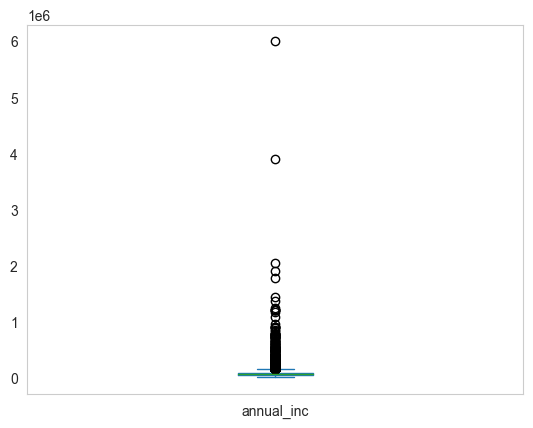

In [48]:
data_filtered['annual_inc'].plot.box()

In [49]:
data_filtered['annual_inc'].quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

<Axes: >

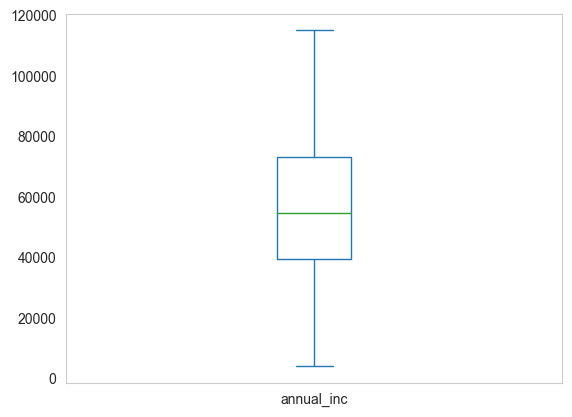

In [50]:
data_filtered[data_filtered['annual_inc'] < data_filtered['annual_inc'].quantile(0.90)]['annual_inc'].plot.box()

<Axes: >

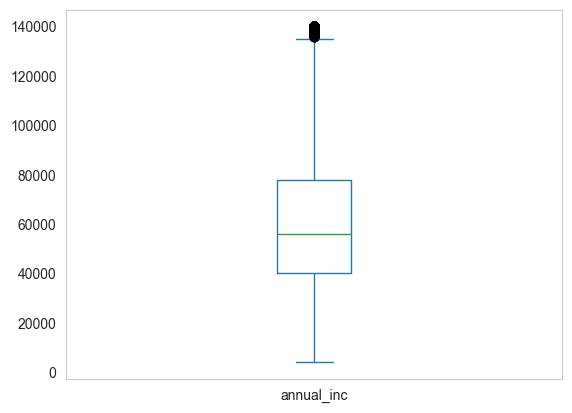

In [51]:
data_filtered[data_filtered['annual_inc'] <= data_filtered['annual_inc'].quantile(0.95)]['annual_inc'].plot.box()

<Axes: >

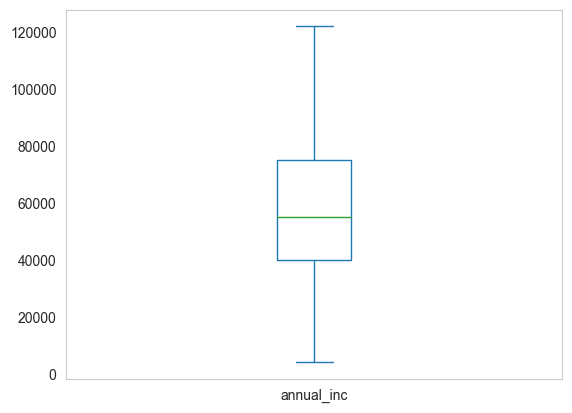

In [52]:
data_filtered[data_filtered['annual_inc'] <= data_filtered['annual_inc'].quantile(0.92)]['annual_inc'].plot.box()

In [53]:
data_filtered = data_filtered[data_filtered['annual_inc'] <= data_filtered['annual_inc'].quantile(0.92)]

<Axes: >

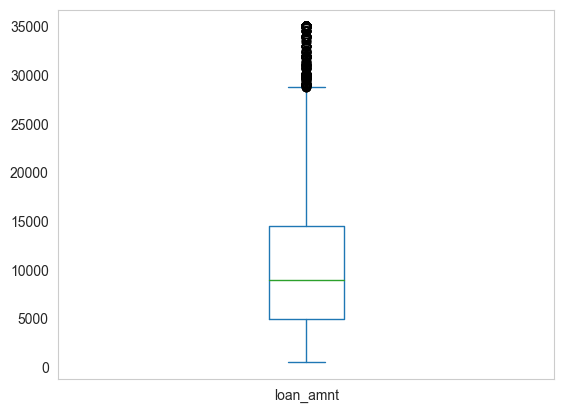

In [54]:
data_filtered['loan_amnt'].plot.box()

In [55]:
# data_filtered[data_filtered['loan_amnt'] <= data_filtered['loan_amnt'].quantile(0.95)]['loan_amnt'].plot.box()

In [56]:
# data_filtered['loan_amnt'] = data_filtered[data_filtered['loan_amnt'] <= data_filtered['loan_amnt'].quantile(0.95)]['loan_amnt']

In [57]:
Q1 = data_filtered['loan_amnt'].quantile(0.25)
Q3 = data_filtered['loan_amnt'].quantile(0.75)
IQR = Q3 - Q1
IQR

9500.0

<Axes: ylabel='Frequency'>

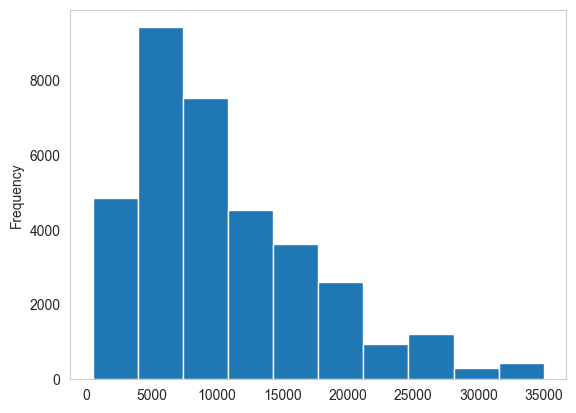

In [58]:
data_filtered['loan_amnt'].plot.hist()

<Axes: ylabel='Frequency'>

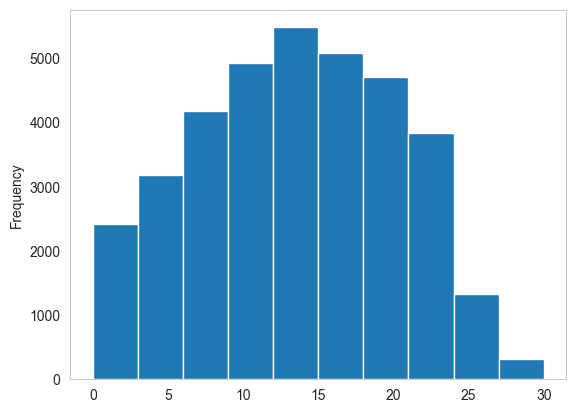

In [59]:
data_filtered['dti'].plot.hist()

<Axes: >

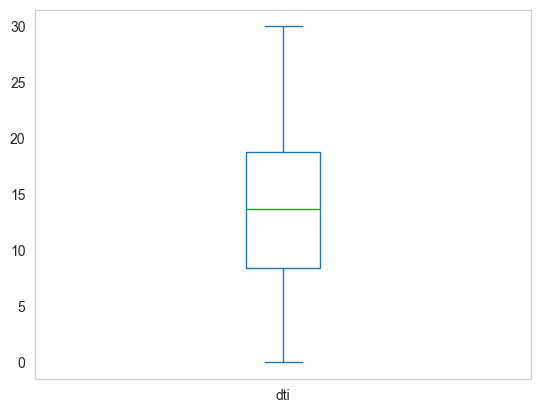

In [60]:
data_filtered['dti'].plot.box()

<Axes: xlabel='Interest rate distribution', ylabel='Frequency'>

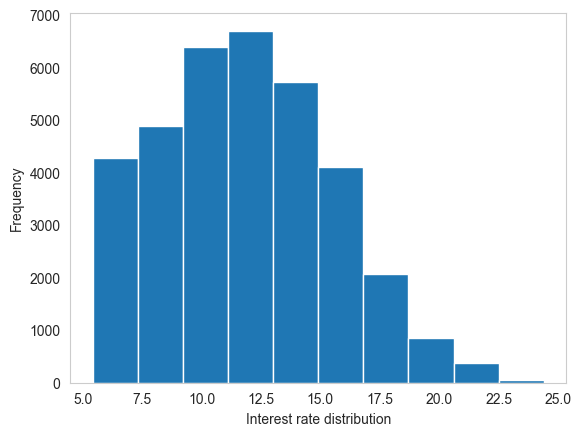

In [61]:
data_filtered['int_rate'].plot.hist(xlabel='Interest rate distribution')

<Axes: >

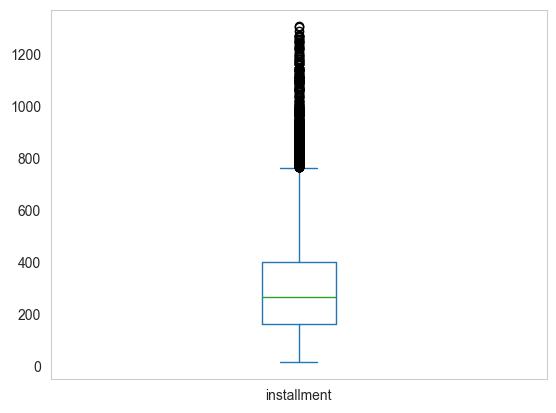

In [62]:
data_filtered['installment'].plot.box()

<Axes: >

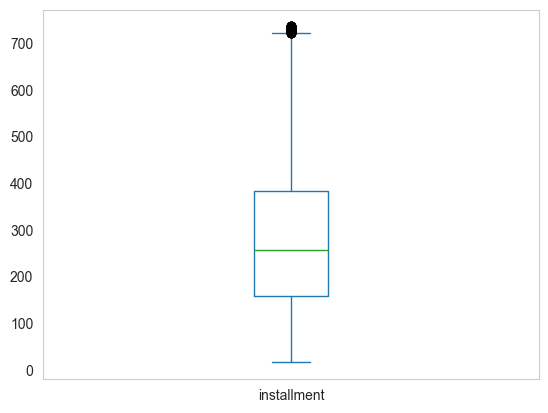

In [63]:
data_filtered[data_filtered['installment'] <= data_filtered['installment'].quantile(0.96)]['installment'].plot.box()

In [64]:
data_filtered['installment'] = data_filtered[data_filtered['installment'] <= data_filtered['installment'].quantile(0.96)]['installment']

# Univariate Analysis

In [65]:
charged_off_data =  data_filtered[data_filtered.loan_status == 'Charged Off']

fully_paid_data =  data_filtered[data_filtered.loan_status == 'Fully Paid']

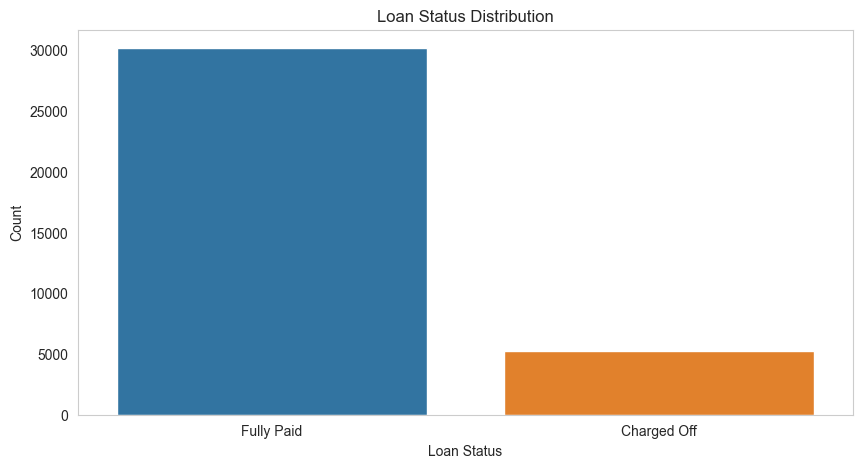

In [66]:
plt.figure(figsize=(10,5))
sns.countplot(x=data_filtered['loan_status'])
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

<b> Observation - </b> Less number of loans are defaulted

C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


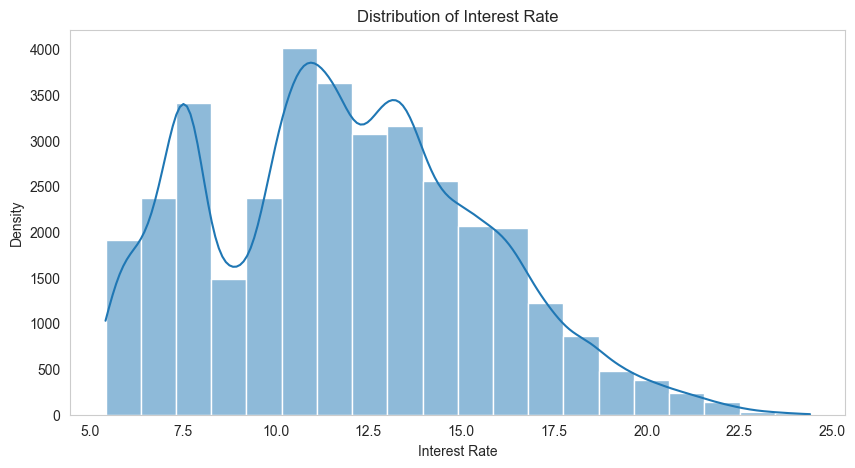

In [67]:
plt.figure(figsize=(10,5))
sns.histplot(sorted(data_filtered.int_rate),kde=True,bins=20)
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Distribution of Interest Rate')
plt.show()

<b> Obserbation- </b> We found between 5-8% interest and 10-15% being opted more.

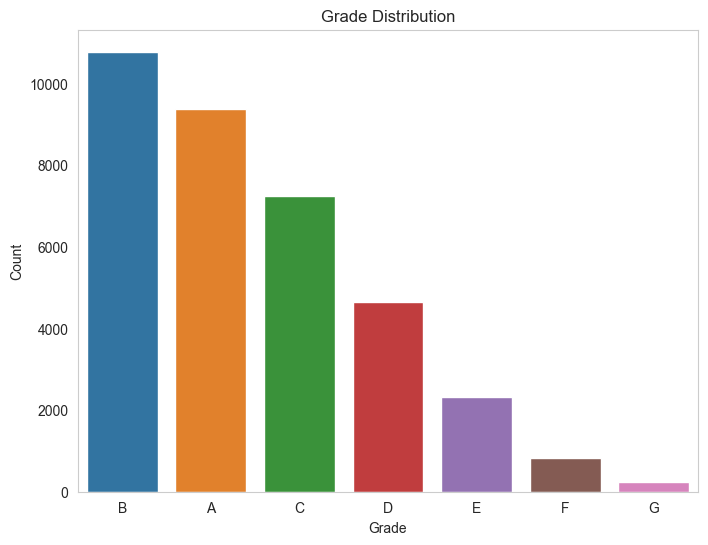

In [68]:
# data_filtered['grade'].value_counts().plot.bar()
plt.figure(figsize=(8, 6))
sns.countplot(x=data_filtered['grade'], order=data_filtered['grade'].value_counts().index)
plt.title('Grade Distribution')
plt.xlabel('Grade')
plt.ylabel('Count')

# Show the plot
plt.show()

<b>Observation -</b> We Found frequency of grade B is higher in comparision and followed by A second and C on third place 

C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


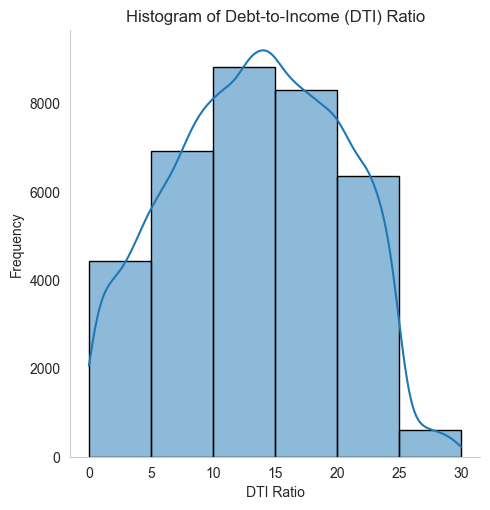

In [69]:
# data_filtered['dti'].plot.hist(xlabel='Debt to Interest Ratio')
# create bins by percentage 


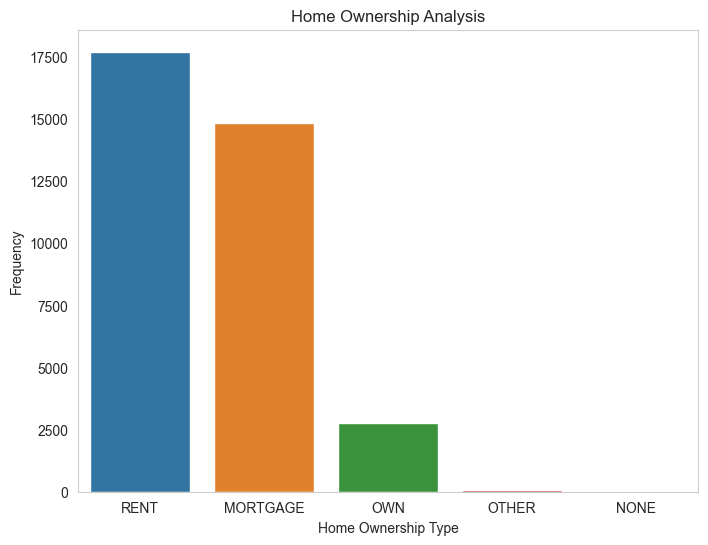

In [70]:
# data_filtered['home_ownership'].value_counts().plot.bar(title='Home ownership analysis', xlabel='Ownership type', ylabel='No. of homes') #Make it agaainsnt charged off
plt.figure(figsize=(8, 6))
sns.countplot(x=data_filtered['home_ownership'], order=data_filtered['home_ownership'].value_counts().index)
plt.title('Home Ownership Analysis')
plt.xlabel('Home Ownership Type')
plt.ylabel('Frequency')

# Show the plot
plt.show()

<b> Observation -</b> The highest applicants have either rented or on Mortgage.

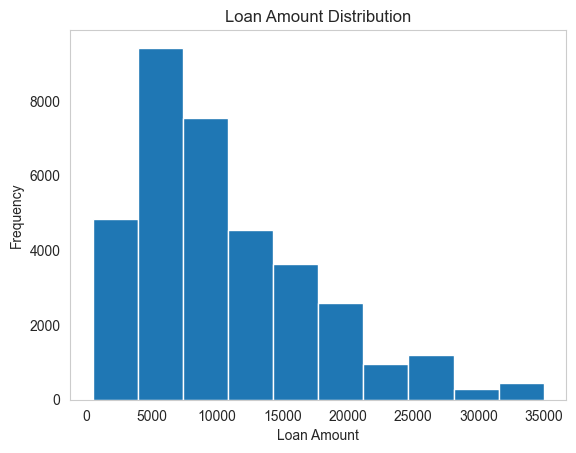

In [101]:
data_filtered['loan_amnt'].plot.hist(title='Loan Amount Distribution',xlabel="Loan Amount", ylabel='Frequency' )
plt.show()

<b> Observation -</b> We found Distribution of loan amount lies between 2k to 18k

C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


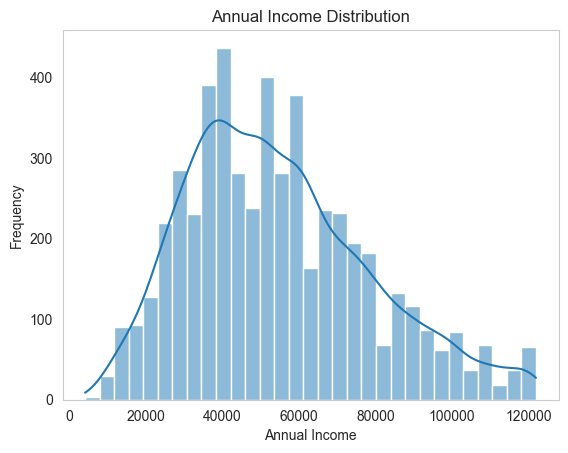

In [102]:
sns.histplot(charged_off_data['annual_inc'], kde=True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

<b> Observation - </b> We found most frequent Annual income fall between 25K to 80k

C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


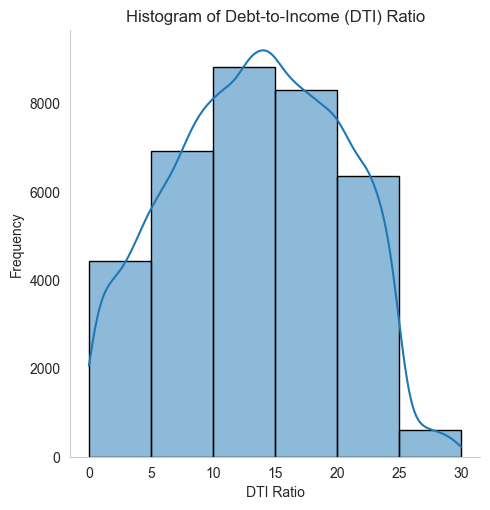

In [103]:
sns.displot(data_filtered['dti'], bins=6, edgecolor='black', kde=True)
plt.title('Histogram of Debt-to-Income (DTI) Ratio')
plt.xlabel('DTI Ratio')
plt.ylabel('Frequency')
plt.show()

<b>Observation -</b> We found D.T.I. 10%-15% is the highest

In [71]:
source_verified_perc =data_filtered['verification_status'].value_counts().iloc[2] / data_filtered['verification_status'].value_counts().sum()

In [72]:
verified_perc = data_filtered['verification_status'].value_counts().iloc[1] / data_filtered['verification_status'].value_counts().sum()

In [73]:
not_verified_perc = data_filtered['verification_status'].value_counts().iloc[0] / data_filtered['verification_status'].value_counts().sum()

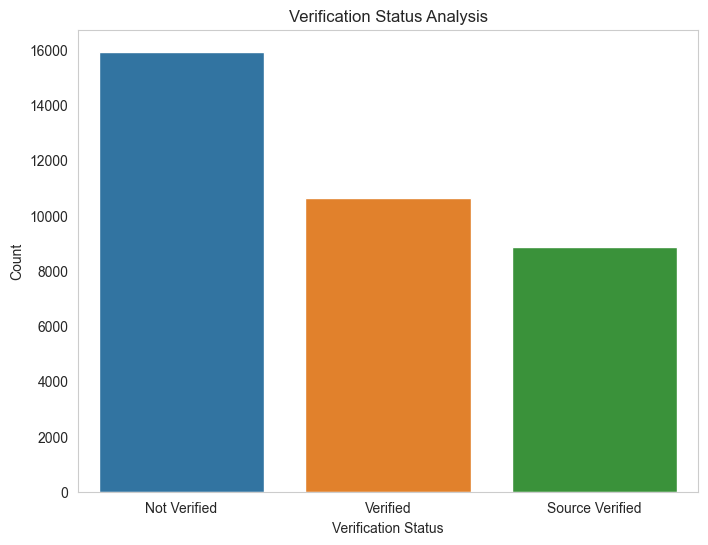

In [74]:
# data_filtered['verification_status'].value_counts().plot.bar(title='Home ownership analysis', xlabel='Ownership type', ylabel='No. of homes')
plt.figure(figsize=(8, 6))
sns.countplot(x=data_filtered['verification_status'], order=data_filtered['verification_status'].value_counts().index)
plt.title('Verification Status Analysis')
plt.xlabel('Verification Status')
plt.ylabel('Count')

# Show the plot
plt.show()

<b>Observation - </b> Around 55% are verified income sources if we combine Verified and Source Verified 

In [108]:
data_filtered['installment'].quantile(0.99)

691.4329999999998

C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


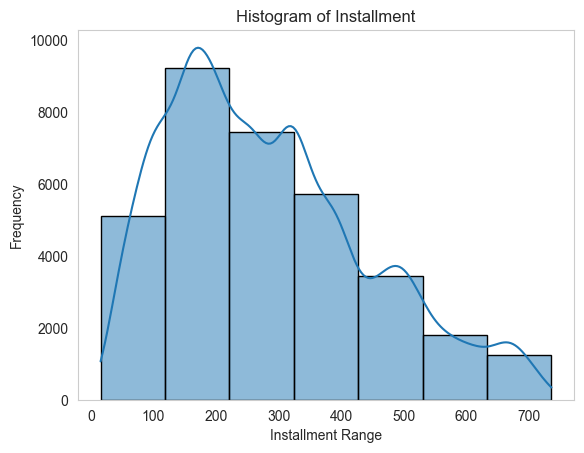

In [75]:
sns.histplot(data_filtered['installment'], bins=7, edgecolor='black', kde=True)
plt.title('Histogram of Installment')
plt.xlabel('Installment Range')
plt.ylabel('Frequency')
plt.show()

<b>Observation- </b> We Found the Installment Range 100-200 being the highest and trend keeps declining from here

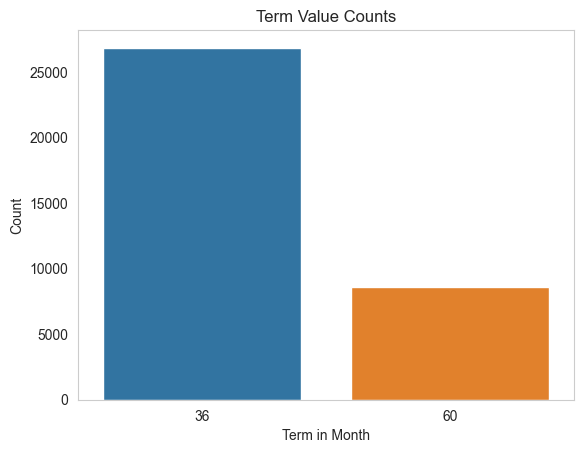

In [76]:
sns.countplot(x='term', data=data_filtered)
plt.title('Term Value Counts')
plt.xlabel('Term in Month')
plt.ylabel('Count')
plt.show()

<b>Observation -</b> Majority of the people opted for 36 month term

In [100]:
# sns.histplot(data_filtered['loan_amnt'], kde=True)
# plt.title('Loan Amount Distribution')
# plt.xlabel('Loan Amount')
# plt.ylabel('Frequency')
# plt.show()

# Bivariate Analysis

<h5> Segmented Bivariate analysis for Purpose of loan </h5>

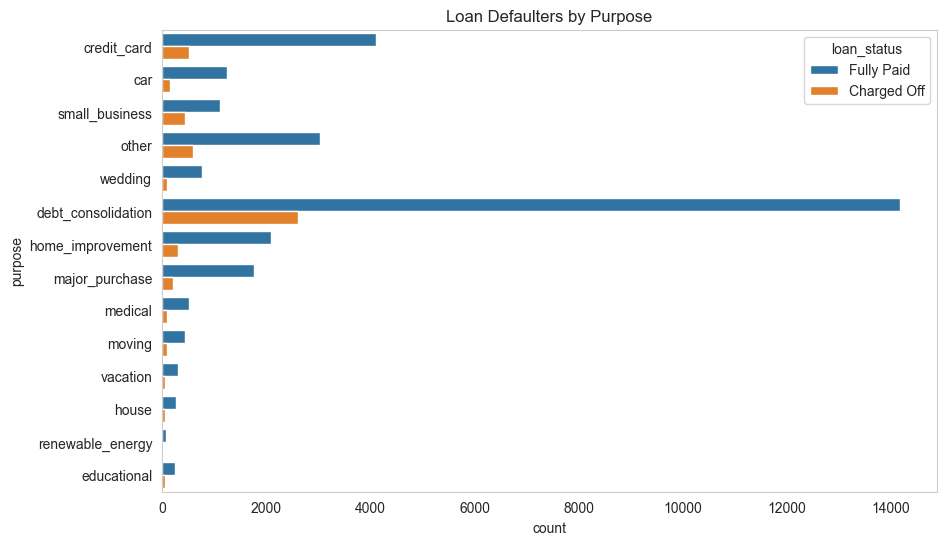

In [79]:
plt.figure(figsize=(10, 6))
sns.countplot(y ='purpose', data=data_filtered, hue='loan_status') # 
plt.title('Loan Defaulters by Purpose')
plt.show()

<b>Observation</b> - We found debt consolidation has the most of defaulters and fully paid but ratio between fully paid vs Charged off is high.

# Grouping of data for Bivariate analysis (Segmented)

In [80]:
grouped_data = data_filtered.groupby('loan_status')[['loan_amnt', 'int_rate']].mean().reset_index()

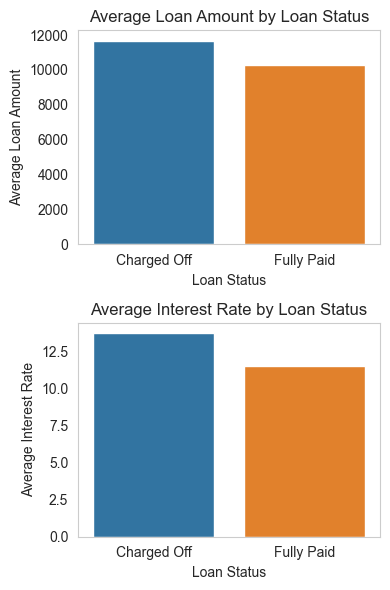

In [81]:
# Create a figure with two subplots
fig, axs = plt.subplots(2, figsize=(4,6))

# Plot loan_amnt vs loan_status on the first subplot
sns.barplot(x='loan_status', y='loan_amnt', data=grouped_data, ax=axs[0])
axs[0].set_title('Average Loan Amount by Loan Status')
axs[0].set_xlabel('Loan Status')
axs[0].set_ylabel('Average Loan Amount')

# Plot int_rate vs loan_status on the second subplot
sns.barplot(x='loan_status', y='int_rate', data=grouped_data, ax=axs[1])
axs[1].set_title('Average Interest Rate by Loan Status')
axs[1].set_xlabel('Loan Status')
axs[1].set_ylabel('Average Interest Rate')

# Layout so plots do not overlap
fig.tight_layout()

plt.show()

<b>Observation -</b>We found the Average loan amount as well as Average interest rate for Charged off loan is slighly on higher side.

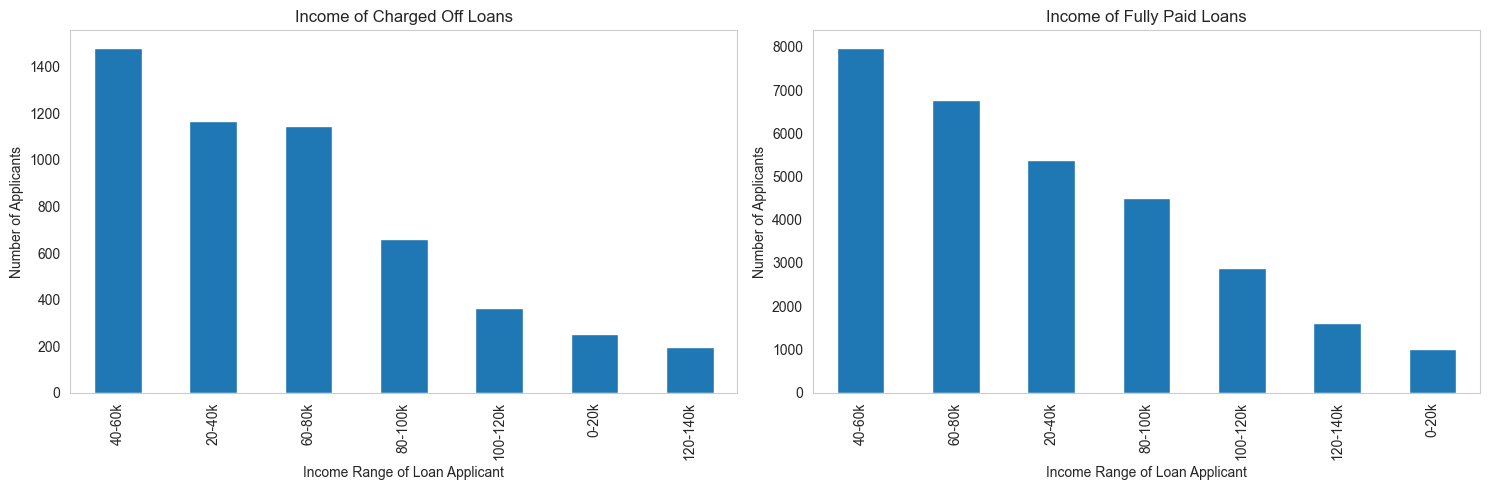

In [82]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Define custom labels
charged_off_labels = ['0-20k', '20-40k', '40-60k', '60-80k', '80-100k', '100-120k', '120-140k']

# Bin the values with custom labels
bins_charged_off = pd.cut(charged_off_data['annual_inc'], bins=7, labels=charged_off_labels)

# Plot the value counts
bins_charged_off.value_counts().plot(kind='bar', ax=axs[0])
axs[0].set_xlabel('Income Range of Loan Applicant')
axs[0].set_ylabel('Number of Applicants')
axs[0].set_title('Income of Charged Off Loans')






# Define custom labels
fully_paid_labels = ['0-20k', '20-40k', '40-60k', '60-80k', '80-100k', '100-120k', '120-140k']

# Bin the values with custom labels
bins_fully_paid = pd.cut(fully_paid_data['annual_inc'], bins=7, labels=fully_paid_labels)

# Plot the value counts
bins_fully_paid.value_counts().plot(kind='bar', ax=axs[1])
axs[1].set_xlabel('Income Range of Loan Applicant')
axs[1].set_ylabel('Number of Applicants')
axs[1].set_title('Income of Fully Paid Loans')



plt.tight_layout()  # Ensure labels fit within the figure
plt.show()

In [83]:
data_filtered.groupby('term')['loan_status'].count()

term
36    26862
60     8584
Name: loan_status, dtype: int64

In [84]:
data_filtered.groupby('term')['int_rate'].mean()

term
36    10.967615
60    14.667568
Name: int_rate, dtype: float64

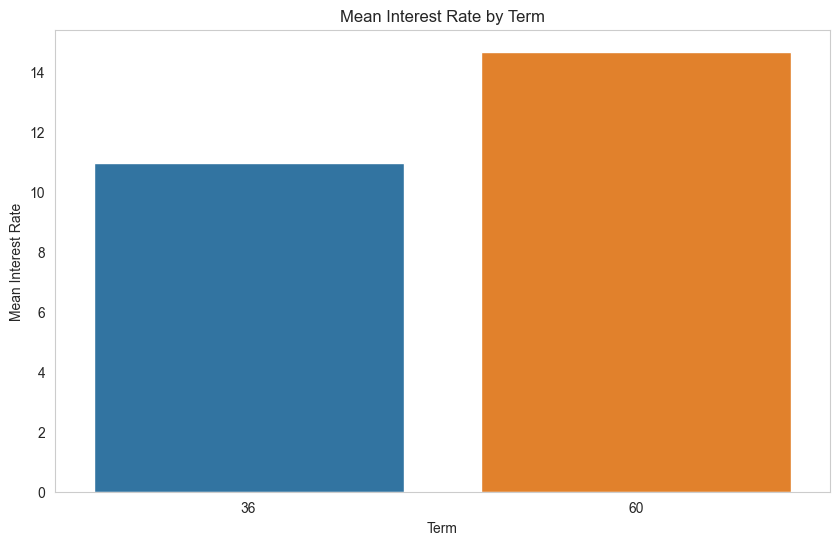

In [85]:
plt.figure(figsize=(10,6))
sns.barplot(x=data_filtered.groupby('term')['int_rate'].mean().index, 
             y=data_filtered.groupby('term')['int_rate'].mean().values)
plt.title('Mean Interest Rate by Term')
plt.xlabel('Term')
plt.ylabel('Mean Interest Rate')
plt.show()

<b> Observation -</b> We have observed that the average interest rate for 36 month term is 10.967615% and for 60 month it is 14.667568% .So we can conclude the higher the term the interest rate rises.

In [114]:
ratio_by_state = data_filtered.groupby(['addr_state', 'loan_status'])['loan_status'].count() / \
data_filtered.groupby('addr_state')['loan_status'].count()
ratio_by_state

addr_state  loan_status
AK          Charged Off    0.185714
            Fully Paid     0.814286
AL          Charged Off    0.120773
            Fully Paid     0.879227
AR          Charged Off    0.112108
            Fully Paid     0.887892
AZ          Charged Off    0.146871
            Fully Paid     0.853129
CA          Charged Off    0.165766
            Fully Paid     0.834234
CO          Charged Off    0.130194
            Fully Paid     0.869806
CT          Charged Off    0.137558
            Fully Paid     0.862442
DC          Charged Off    0.068783
            Fully Paid     0.931217
DE          Charged Off    0.104762
            Fully Paid     0.895238
FL          Charged Off    0.183007
            Fully Paid     0.816993
GA          Charged Off    0.162660
            Fully Paid     0.837340
HI          Charged Off    0.173077
            Fully Paid     0.826923
IA          Fully Paid     1.000000
ID          Charged Off    0.200000
            Fully Paid     0.800000
IL  

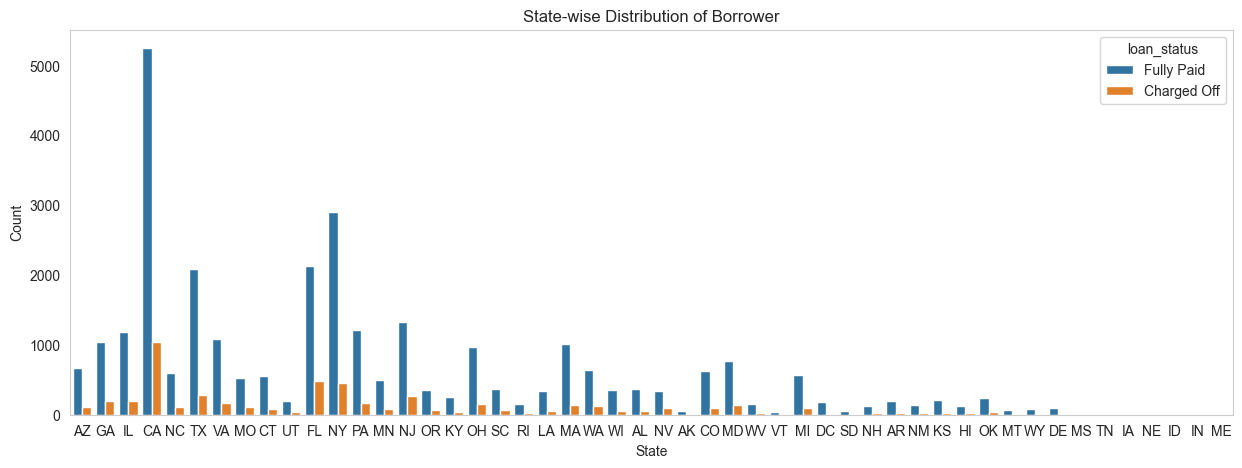

In [110]:
plt.figure(figsize=(15,5))
sns.countplot(x=data_filtered.addr_state,hue=data_filtered.loan_status)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('State-wise Distribution of Borrower',fontsize=12)
plt.show()

<b>Observation </b> We found that no. of borrowers are higher for Califonia State for fully paid as well as defaulters but the ratio for fully paid higher in Wyoming state around 95% and around 5% defaulted.

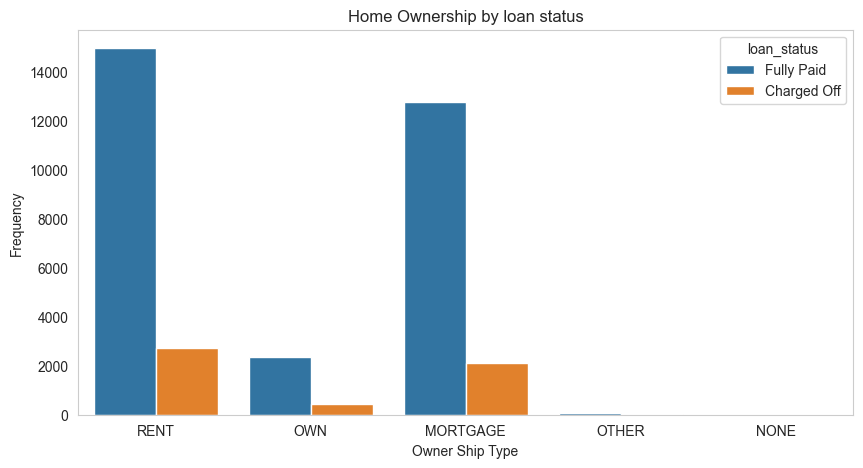

In [87]:
plt.figure(figsize=(10,5))
sns.countplot(x=data_filtered.home_ownership,hue=data_filtered.loan_status)
plt.xlabel('Owner Ship Type')
plt.ylabel('Frequency')
plt.title('Home Ownership by loan status',fontsize=12)
plt.show()

C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-

<Figure size 3000x3000 with 0 Axes>

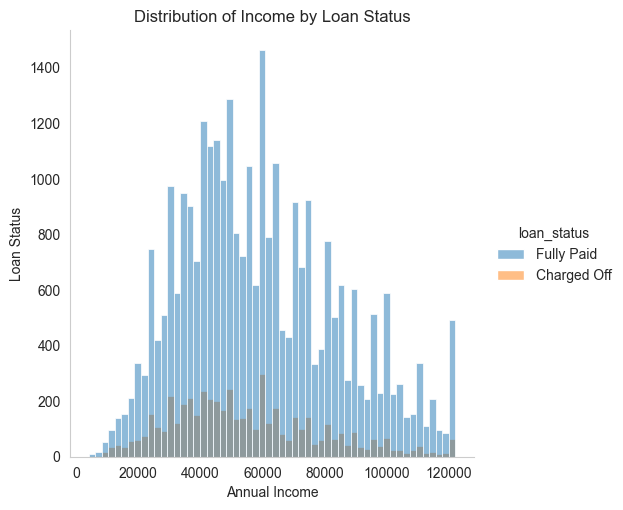

In [88]:
plt.figure(figsize=(30,30))
sns.displot(x=data_filtered.annual_inc,hue=data_filtered.loan_status)
plt.xlabel('Annual Income')
plt.ylabel('Loan Status')
plt.title('Distribution of Income by Loan Status',fontsize=12)
plt.show()

C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-

<Figure size 3000x3000 with 0 Axes>

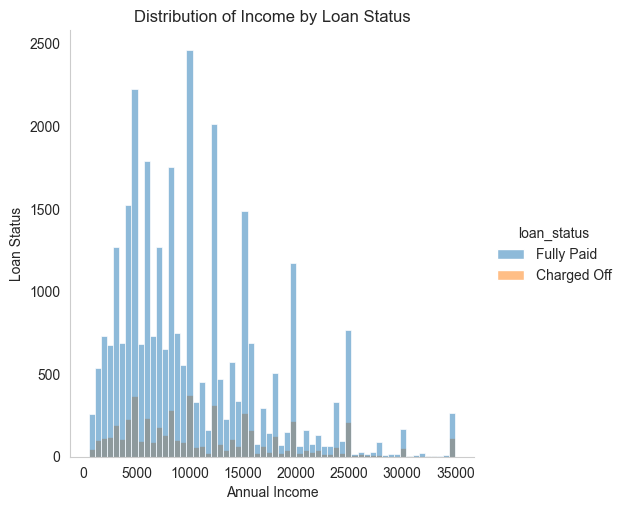

In [89]:
plt.figure(figsize=(30,30))
sns.displot(x=data_filtered.loan_amnt,hue=data_filtered.loan_status)
plt.xlabel('Annual Income')
plt.ylabel('Loan Status')
plt.title('Distribution of Income by Loan Status',fontsize=12)
plt.show()

C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-

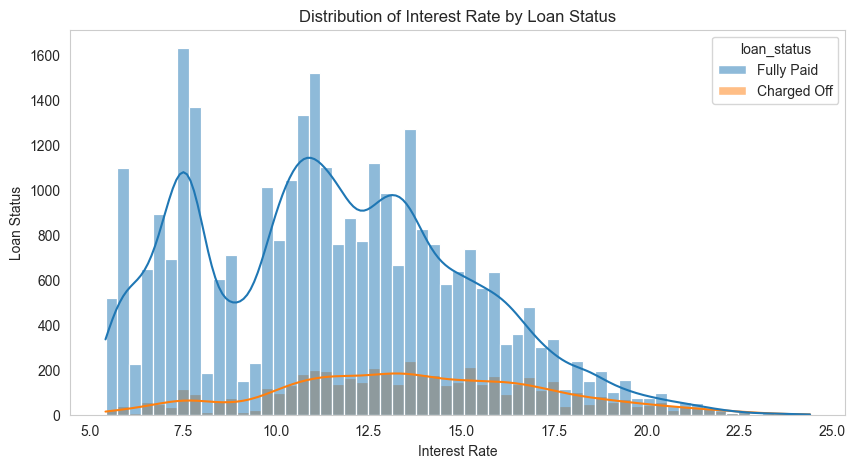

In [90]:
plt.figure(figsize=(10,5))
sns.histplot(x=data_filtered.int_rate,hue=data_filtered.loan_status, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Loan Status')
plt.title('Distribution of Interest Rate by Loan Status',fontsize=12)
plt.show()

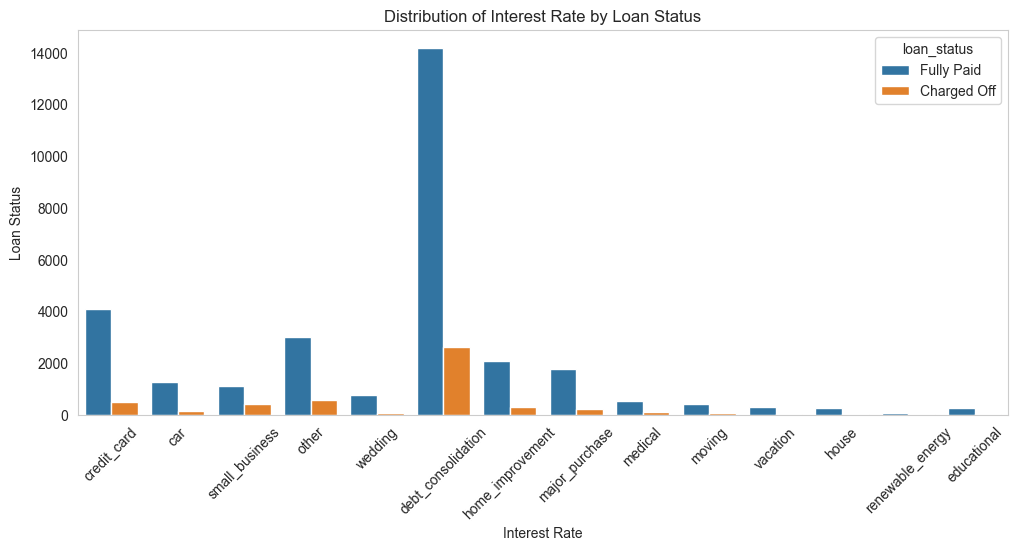

In [91]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=45)  
sns.countplot(x=data_filtered.purpose,hue=data_filtered.loan_status, orient='h')
plt.xlabel('Interest Rate')
plt.ylabel('Loan Status')
plt.title('Distribution of Interest Rate by Loan Status')
plt.show()

C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-

<Figure size 500x500 with 0 Axes>

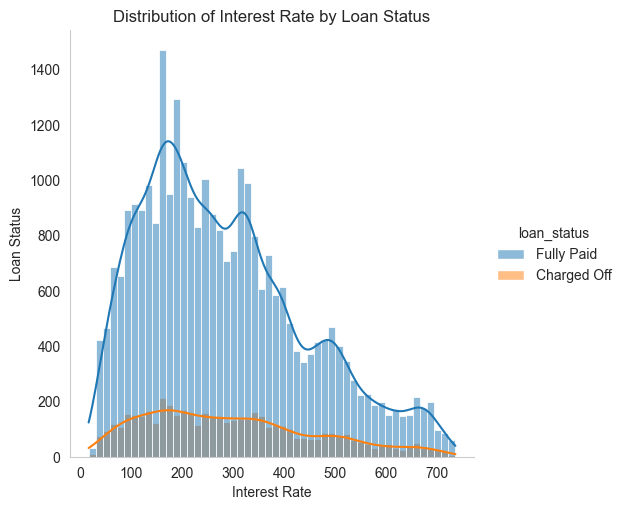

In [92]:
plt.figure(figsize=(5,5))
# plt.xticks(rotation=45)  
sns.displot(x=data_filtered.installment,hue=data_filtered.loan_status, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Loan Status')
plt.title('Distribution of Interest Rate by Loan Status')
plt.show()

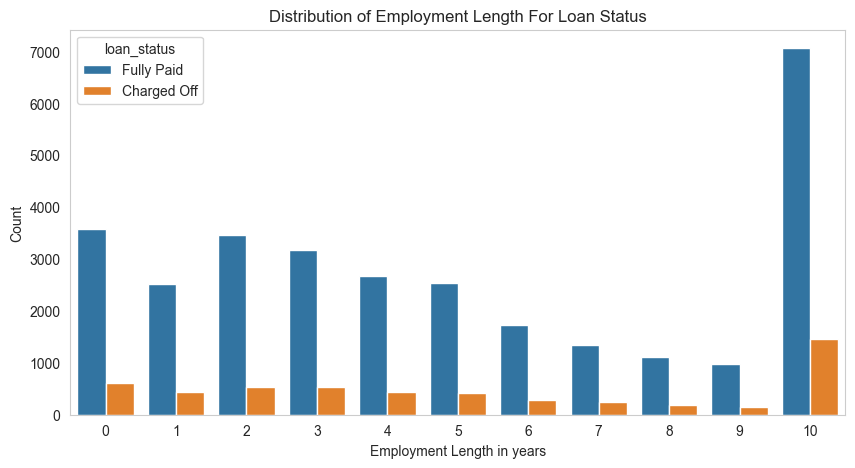

In [93]:
# Distribution of emp_length based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=data_filtered,x='emp_length',hue='loan_status')
plt.xlabel('Employment Length in years')
plt.ylabel('Count')
plt.title('Distribution of Employment Length For Loan Status',fontsize=12)
plt.show()

C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-

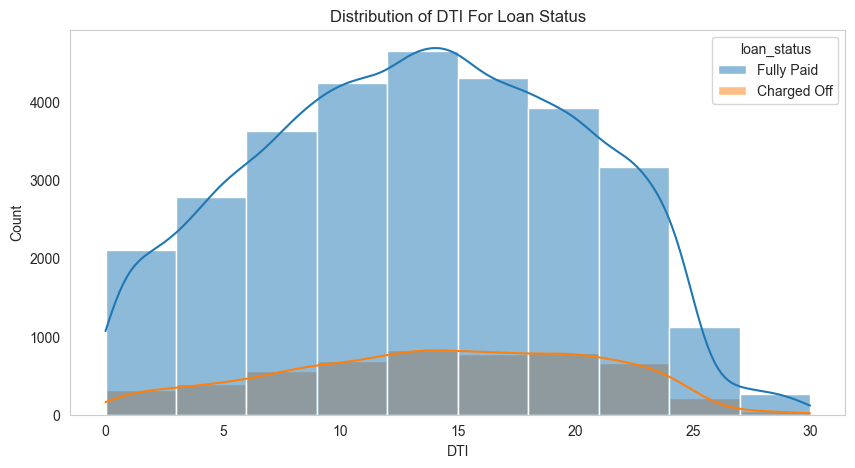

In [94]:
plt.figure(figsize=(10,5))
sns.histplot(data=data_filtered,x='dti',hue='loan_status',bins=10, kde=True)
plt.xlabel('DTI')
plt.ylabel('Count')
plt.title('Distribution of DTI For Loan Status',fontsize=12)
plt.show()

# Multi Variate analysis

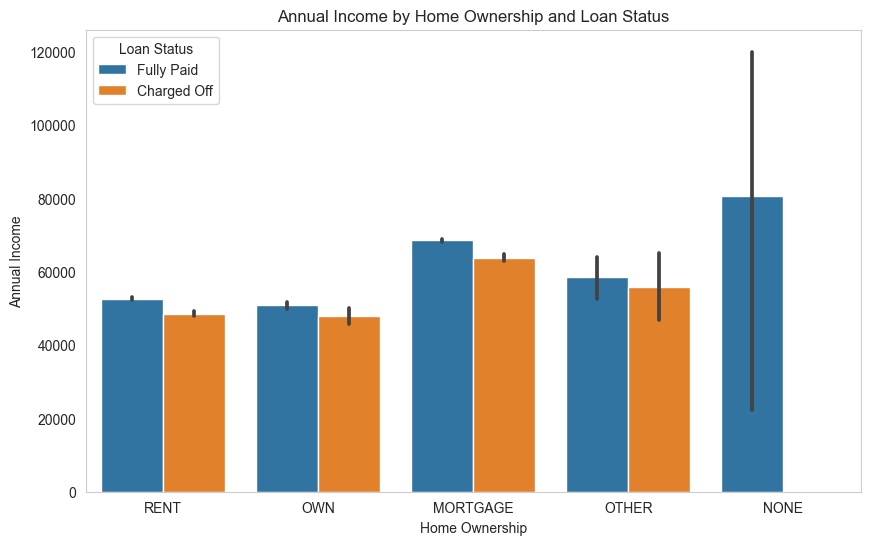

In [95]:
# Create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=data_filtered, x='home_ownership', y='annual_inc', hue='loan_status')

# Add title and labels
plt.title('Annual Income by Home Ownership and Loan Status')
plt.xlabel('Home Ownership')
plt.ylabel('Annual Income')

# Add legend title
plt.legend(title='Loan Status')

# Show the plot
plt.show()

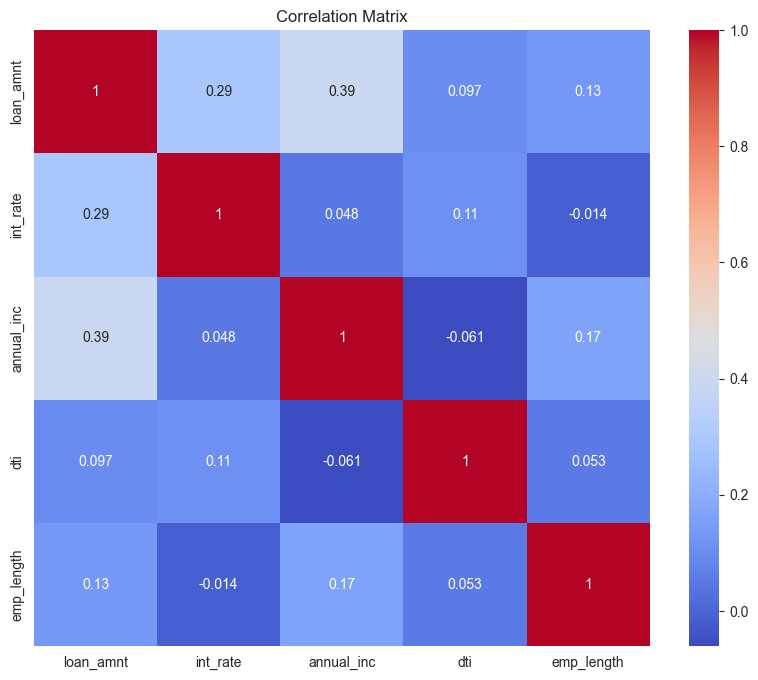

In [96]:
# Calculate the correlation matrix
corr_matrix = data_filtered[['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'emp_length']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()